---Lab Task 1: MFCC Feature Preparation and Visualization---

Loaded audio: /hello.wav (Sample Rate: 48000 Hz)
MFCCs extracted. Dimensions: 335 frames x 13 coefficients


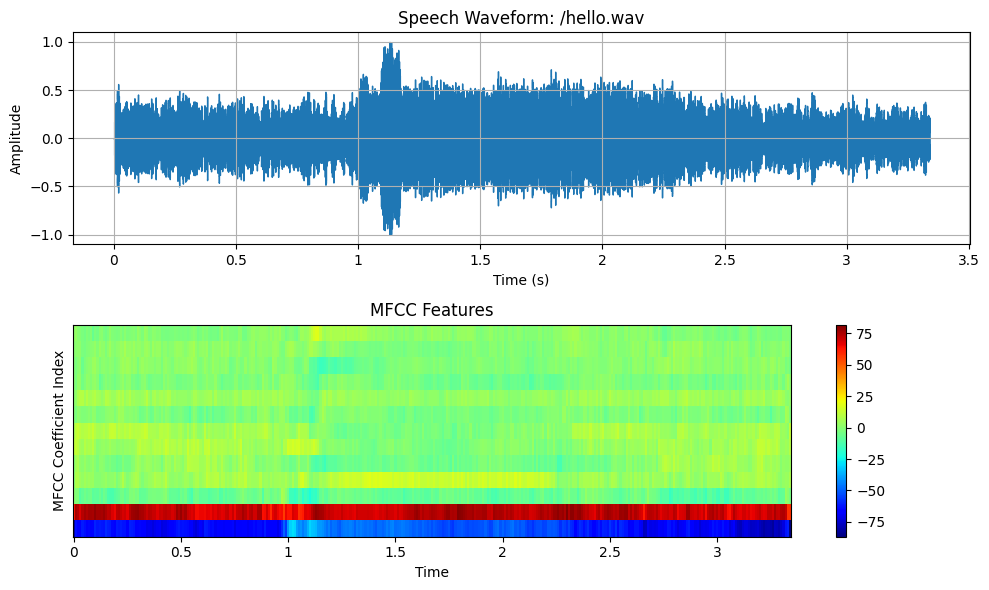

MFCC features normalized (mean 0, std 1).


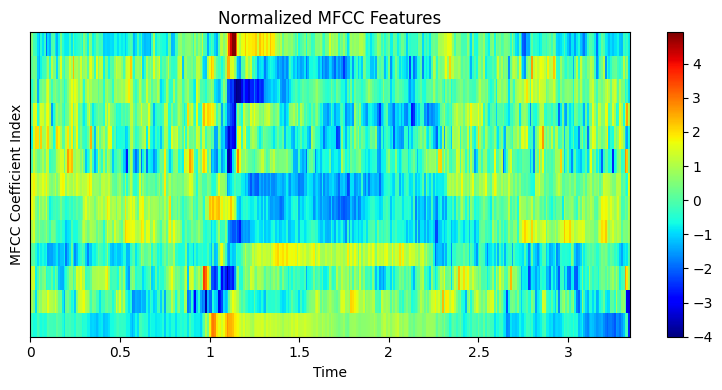

Aggregated feature vector: 1 x 13
Aggregated Feature Vector:
[ 1.4803302e-07  4.4409907e-07 -4.1278440e-08 -1.7080734e-07
 -2.2774312e-08  4.5548624e-08 -1.1387156e-08  1.1387156e-08
 -7.9710091e-08 -4.5548624e-08 -1.1387156e-08 -2.2774312e-08
 -4.5548624e-08]


<ipython-input-3-9c29a8dd170a>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)



Loaded audio: /hiii.m4a (Sample Rate: 48000 Hz)
MFCCs extracted. Dimensions: 297 frames x 13 coefficients


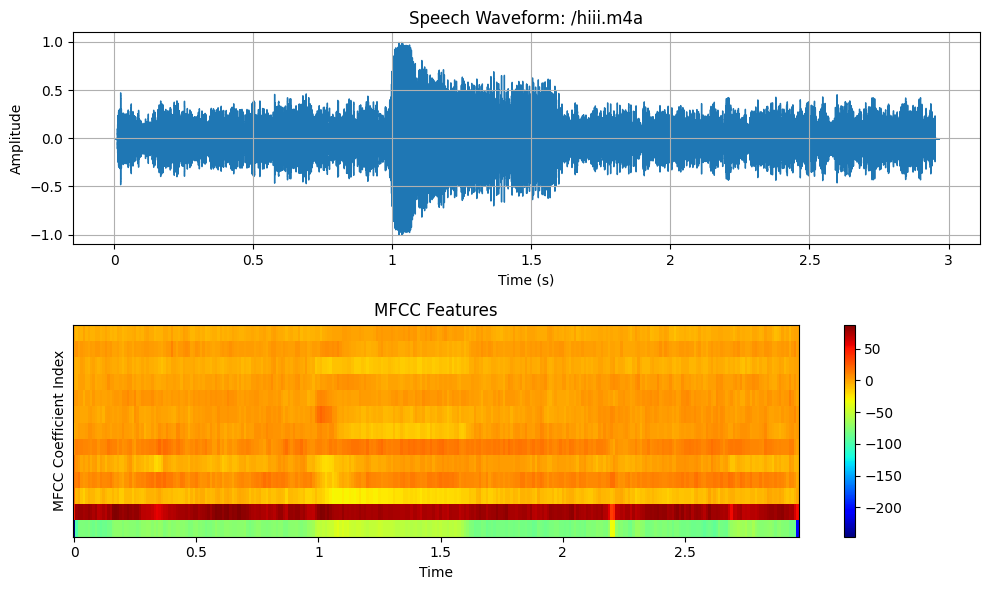

MFCC features normalized (mean 0, std 1).


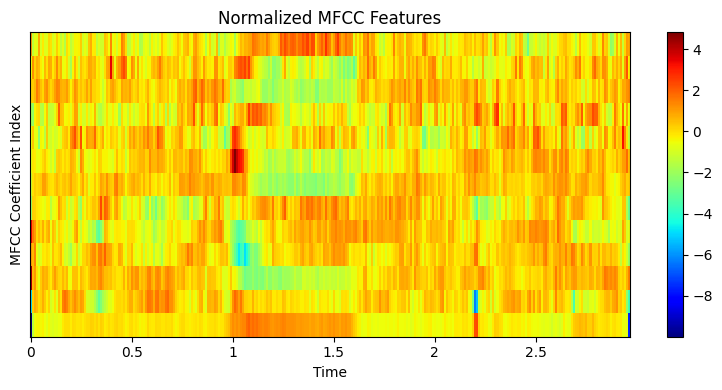

Aggregated feature vector: 1 x 13
Aggregated Feature Vector:
[ 1.4770713e-07 -2.5688198e-07  5.1376393e-08  7.7064591e-08
  0.0000000e+00 -7.0642542e-08  3.8532296e-08 -6.4220491e-09
 -3.5321271e-08  1.9266148e-08  1.2844098e-08 -6.4220491e-09
 -6.4220491e-09]

Loaded audio: /wania.m4a (Sample Rate: 48000 Hz)
MFCCs extracted. Dimensions: 233 frames x 13 coefficients


<ipython-input-3-9c29a8dd170a>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


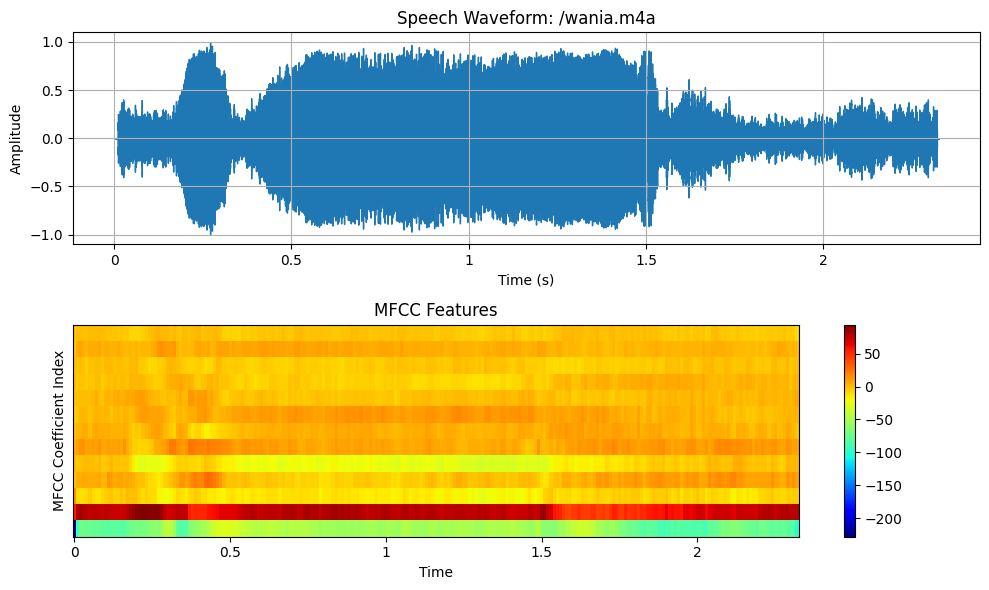

MFCC features normalized (mean 0, std 1).


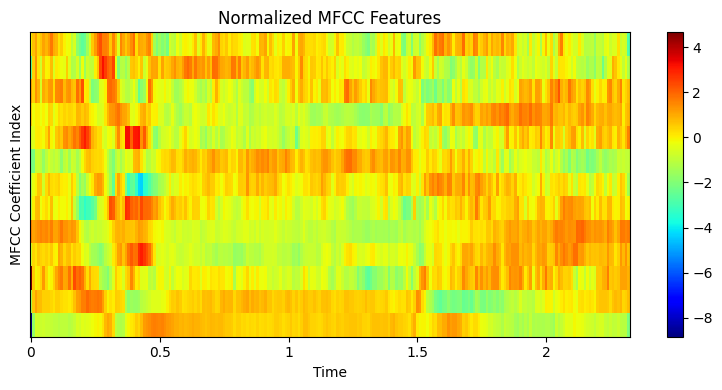

Aggregated feature vector: 1 x 13
Aggregated Feature Vector:
[ 1.1460464e-07 -5.2390692e-07 -1.1869766e-07 -1.6372091e-08
  5.3209298e-08  2.7372090e-08 -3.2744182e-08 -8.1860456e-08
  1.8418604e-08  3.2744182e-08  8.1860456e-08 -3.2744182e-08
  7.3674414e-08]

Lab Task 1 Complete. Review all outputs.


In [3]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# --- Configuration ---
audio_files = ['/hello.wav', '/hiii.m4a', '/wania.m4a']  # List of individual files
n_mfcc_coeffs = 13

# --- 1. Review MFCC Extraction ---
print('---Lab Task 1: MFCC Feature Preparation and Visualization---')

for filename in audio_files:
    if os.path.isfile(filename):
        y, sr = librosa.load(filename, sr=None)
        y = y / np.max(np.abs(y))
        print(f'\nLoaded audio: {filename} (Sample Rate: {sr} Hz)')

        mfccs = librosa.feature.mfcc(
            y=y, sr=sr,
            n_mfcc=n_mfcc_coeffs,
            n_fft=int(0.025 * sr),
            hop_length=int(0.010 * sr),
            n_mels=26
        )
        print(f'MFCCs extracted. Dimensions: {mfccs.shape[1]} frames x {mfccs.shape[0]} coefficients')

        # --- Plot Waveform and MFCC ---
        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        librosa.display.waveshow(y, sr=sr)
        plt.title(f'Speech Waveform: {filename}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)

        plt.subplot(2, 1, 2)
        img1 = librosa.display.specshow(mfccs, x_axis='time', sr=sr, hop_length=int(0.010 * sr), cmap='jet')
        plt.colorbar(img1)
        plt.title('MFCC Features')
        plt.ylabel('MFCC Coefficient Index')
        plt.tight_layout()
        plt.show()

        # --- 2. Feature Normalization ---
        mean_features = np.mean(mfccs, axis=1, keepdims=True)
        std_features = np.std(mfccs, axis=1, keepdims=True)
        normalized_mfccs = (mfccs - mean_features) / (std_features + 1e-8)
        print('MFCC features normalized (mean 0, std 1).')

        plt.figure(figsize=(8, 4))
        img2 = librosa.display.specshow(normalized_mfccs, x_axis='time', sr=sr, hop_length=int(0.010 * sr), cmap='jet')
        plt.colorbar(img2)
        plt.title('Normalized MFCC Features')
        plt.ylabel('MFCC Coefficient Index')
        plt.tight_layout()
        plt.show()

        # --- 3. Feature Aggregation ---
        aggregated_feature = np.mean(normalized_mfccs, axis=1)
        print(f'Aggregated feature vector: 1 x {aggregated_feature.shape[0]}')
        print('Aggregated Feature Vector:')
        print(aggregated_feature)

    else:
        print(f'File not found: {filename}')

print('\nLab Task 1 Complete. Review all outputs.')


In [6]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# --- Configuration ---
audio_files = {
    '/hello.wav': 'hello',
    '/hiii.m4a': 'hiii',
    '/wania.m4a': 'wania'
}
n_mfcc_coeffs = 13

# --- 1. Dataset Preparation ---
print('---Lab Task 2: Building a Simple Classifier (Isolated Word Recognition)---')
all_features = []
labels = []

for filename, label in audio_files.items():
    if os.path.isfile(filename):
        y, sr = librosa.load(filename, sr=None)
        y = y / np.max(np.abs(y))

        # Extract MFCCs
        mfccs = librosa.feature.mfcc(
            y=y, sr=sr,
            n_mfcc=n_mfcc_coeffs,
            n_fft=int(0.025 * sr),
            hop_length=int(0.010 * sr),
            n_mels=26
        )

        # Normalize MFCCs per utterance
        mfccs = (mfccs - np.mean(mfccs, axis=1, keepdims=True)) / (np.std(mfccs, axis=1, keepdims=True) + 1e-8)

        # Aggregate features (mean over time)
        aggregated_feature = np.mean(mfccs, axis=1)

        all_features.append(aggregated_feature)
        labels.append(label)
    else:
        print(f'File not found: {filename}')

# Encode labels numerically
unique_labels = list(set(labels))
label_map = {name: idx for idx, name in enumerate(unique_labels)}
numeric_labels = np.array([label_map[label] for label in labels])

print(f'Loaded {len(all_features)} samples.')
print(f'Label mapping: {label_map}')

X = np.array(all_features)
y = numeric_labels

# --- 2. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(f'Dataset split: {len(X_train)} training samples, {len(X_test)} testing samples.')

# Train on all and test on all (not for real evaluation)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
acc = accuracy_score(y, y_pred)
print(f'KNN (k=1) Accuracy (same data): {acc * 100:.2f}%')

svm = SVC(kernel='linear')
svm.fit(X, y)
y_pred_svm = svm.predict(X)
acc_svm = accuracy_score(y, y_pred_svm)
print(f'SVM Accuracy (same data): {acc_svm * 100:.2f}%')



---Lab Task 2: Building a Simple Classifier (Isolated Word Recognition)---


<ipython-input-6-8f04767a843e>:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-6-8f04767a843e>:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Loaded 3 samples.
Label mapping: {'hiii': 0, 'wania': 1, 'hello': 2}
Dataset split: 2 training samples, 1 testing samples.
KNN (k=1) Accuracy (same data): 100.00%
SVM Accuracy (same data): 100.00%
